In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [72]:
start = '2012-01-01'
end = '2024-7-30'

stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [73]:
data.reset_index(inplace=True)

In [74]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...,...
3157,2024-07-23,183.839996,185.220001,183.330002,183.600006,183.600006,23772600
3158,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700
3159,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900
3160,2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100


In [75]:
ma_100_days = data.Close.rolling(100).mean()

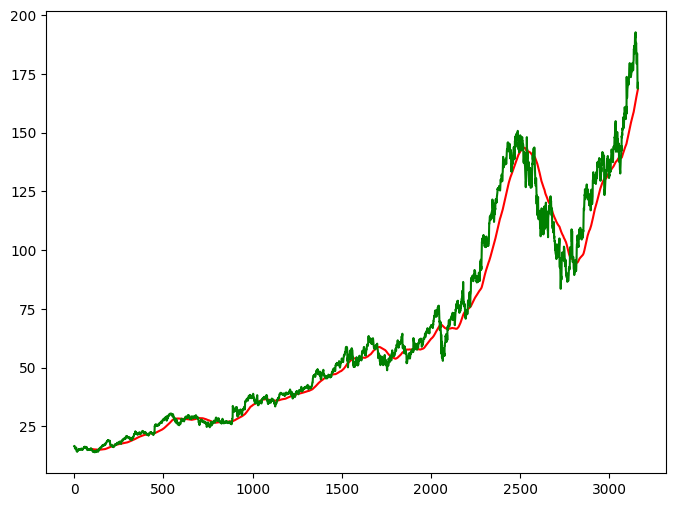

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [77]:
ma_200_days = data.Close.rolling(200).mean()

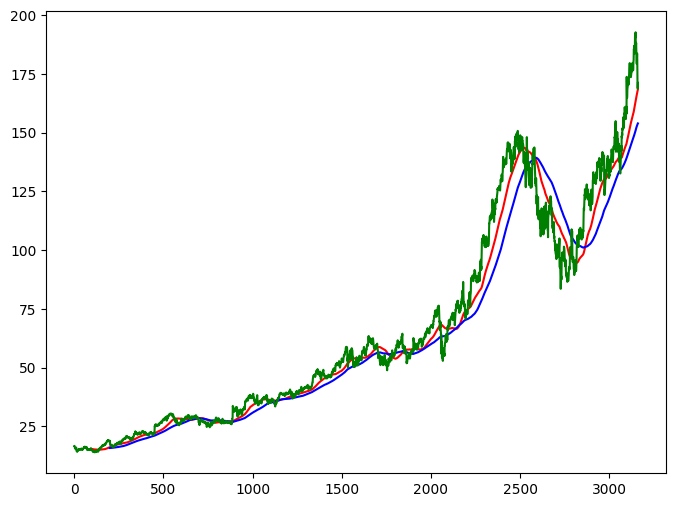

In [78]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [79]:
data.dropna(inplace=True)

In [80]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])

In [81]:
data_train.shape[0]

2529

In [82]:
data_test.shape[0]

633

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [84]:
data_train_scale = scaler.fit_transform(data_train)

In [85]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i, 0])

In [86]:
x, y = np.array(x), np.array(y)

In [87]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [90]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [92]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [93]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
76/76 [==============================] - 29s 290ms/step - loss: 0.0211
Epoch 2/50
76/76 [==============================] - 24s 317ms/step - loss: 0.0043
Epoch 3/50
76/76 [==============================] - 24s 310ms/step - loss: 0.0037
Epoch 4/50
76/76 [==============================] - 23s 295ms/step - loss: 0.0037
Epoch 5/50
76/76 [==============================] - 24s 311ms/step - loss: 0.0031
Epoch 6/50
76/76 [==============================] - 22s 287ms/step - loss: 0.0035
Epoch 7/50
76/76 [==============================] - 24s 309ms/step - loss: 0.0026
Epoch 8/50
76/76 [==============================] - 24s 312ms/step - loss: 0.0031
Epoch 9/50
76/76 [==============================] - 22s 289ms/step - loss: 0.0027
Epoch 10/50
76/76 [==============================] - 24s 315ms/step - loss: 0.0023
Epoch 11/50
76/76 [==============================] - 24s 312ms/step - loss: 0.0023
Epoch 12/50
76/76 [==============================] - 22s 287ms/step - loss: 0.0020
Epoch 13/50
7

In [94]:
pas_100_days = data_train.tail(100)

In [95]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [96]:
data_test_scale = scaler.fit_transform(data_test)

In [97]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i, 0])
x, y = np.array(x), np.array(y)

In [102]:
y_predict = model.predict(x)

20/20 [==============================] - 2s 82ms/step


In [103]:
scale = 1/scaler.scale_

In [104]:
y_predict = y_predict * scale

In [105]:
y = y*scale

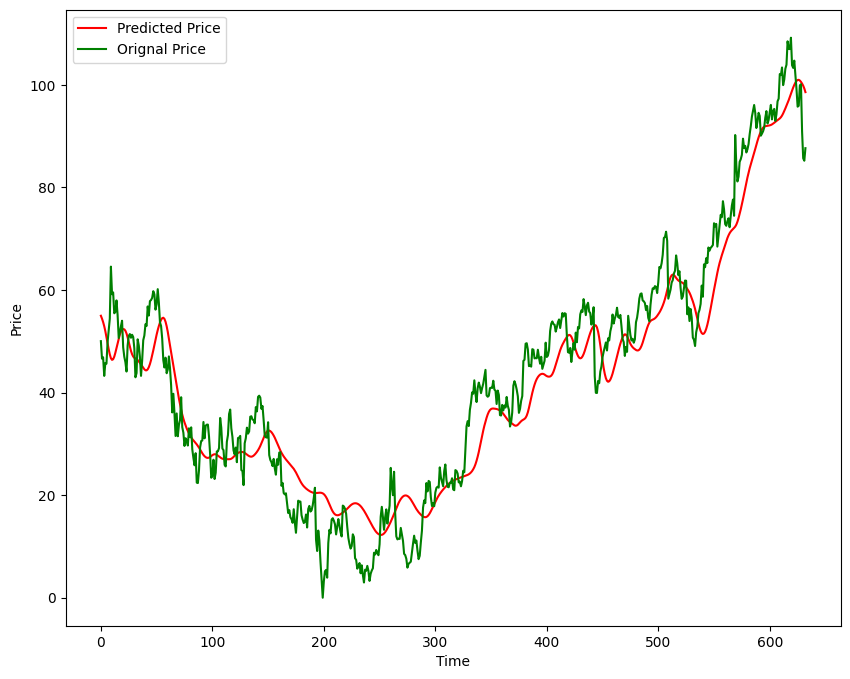

In [106]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Orignal Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [107]:
model.save('Stock Prediction Model.keras')